<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/PR_04_FINALipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("\nFeatures:", ', '.join(california.feature_names))
print("\nBasic statistics of the target variable (house prices):")
print(f"Mean: ${y.mean()*100000:.2f}")
print(f"Min: ${y.min()*100000:.2f}")
print(f"Max: ${y.max()*100000:.2f}")


Dataset Information:
Number of samples: 20640
Number of features: 8

Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Basic statistics of the target variable (house prices):
Mean: $206855.82
Min: $14999.00
Max: $500001.00


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error: $0.53
Mean Squared Error: $0.56
Root Mean Squared Error: $0.75
R-squared Score: 0.5758


In [7]:
feature_importance = pd.DataFrame({
    'Feature': california.feature_names,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))


Feature Importance:
   Feature  Coefficient
  Latitude    -0.896929
 Longitude    -0.869842
    MedInc     0.854383
 AveBedrms     0.339259
  AveRooms    -0.294410
  HouseAge     0.122546
  AveOccup    -0.040829
Population    -0.002308


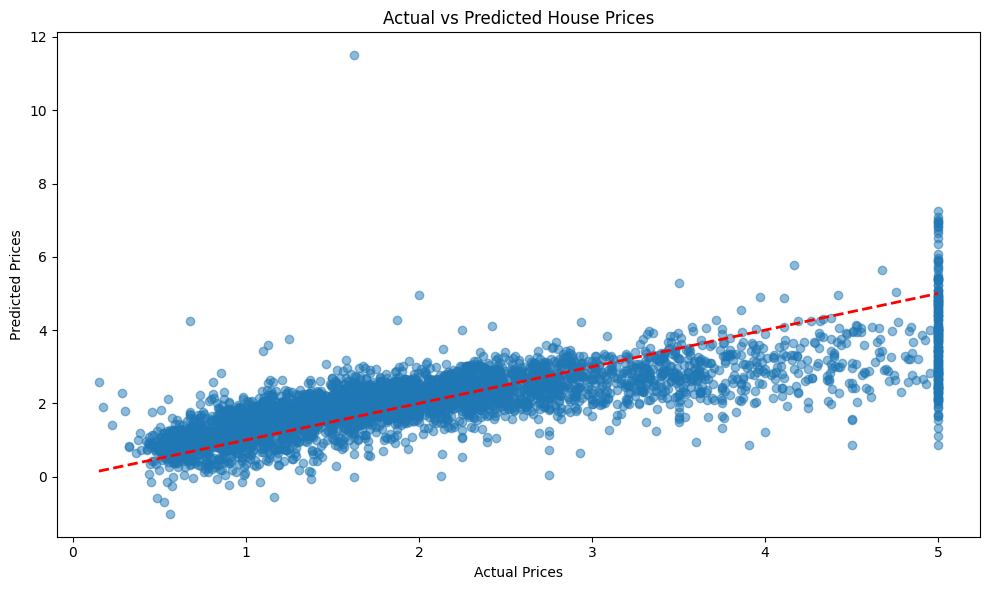

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()